In [1]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro

# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y~X1+X2+...)
import statsmodels.formula.api as smf
# Scaling 클래스
from sklearn.preprocessing import scale, minmax_scale, robust_scale
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse
# Ridge, Lasso, ElasticNet 패키지 불러오기
from sklearn.linear_model import Ridge, Lasso, ElasticNet
# 데이터 분할: train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tress
from sklearn.tree import DecisionTreeRegressor
# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화(.dot 확장자 파일 불러오기 등)
import graphviz

# jupyter notebook 사용 시 그래프 자동 출력 옵션
# matplotlib 이용한 Background 그래프 실행 및 결과 확인
%matplotlib inline

# 음수 표시
plt.rc('axes', unicode_minus=False)
# 맑은 고딕 적용
plt.rc("font", family="Malgun Gothic")

# 회귀분석
목표변수 FAT를 예측하기 위한 파생변수(BMI 등)를 생성하여 회귀분석을 실시하고 결과를 해석하라.  
(BMI 계산 시, WEIGHT 단위는 pound(1lb->0,45kg), HEIGHT 단위는 inch(1inch->2.54cm)이므로 변환하여 사용할 것)
- 데이터 : 체질검사.CSV(변수: 14개, 자료수: 252개)


|변수|변수 설명|변수 역할|변수 형태|
|---|---|---|---|
|FAT|체질 비만도|목표변수|연속형|
|AGE|나이(년)|설명변수|연속형|
|WEIGHT|몸무게(lbs)|설명변수|연속형|  
|HEIGHT|키(inches)|설명변수|연속형|
|NECK|목 둘레(Cm)|설명변수|연속형| 
|CHEST|가슴 둘레(Cm)|설명변수|연속형| 
|ABDOMEN|복부 둘레(Cm)|설명변수|연속형|
|HIP|엉덩이 둘레(Cm)|설명변수|연속형|
|THIGH|허벅지 둘레(Cm)|설명변수|연속형| 
|KNEE|무릎 둘레(Cm)| 설명변수|연속형| 
|ANKLE|발목 둘레(Cm)|설명변수|연속형| 
|BICEPS|이두근 둘레(Cm)|설명변수|연속형|
|FOREARM|팔뚝 둘레(Cm)|설명변수|연속형|
|WRIST|손목 둘레(Cm)|설명변수|연속형|


## 1. 데이터 구성하기

In [2]:
# 파일명, 변수, 값 등에 한글 포함시 engine="python" 지정
df_raw=pd.read_csv("../data/체질검사.csv", engine="python")
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [3]:
# BMI 파생변수 생성
# BMI = 몸무게(kg) / 키(m)의 제곱
df_raw["BMI"]=(df_raw["WEIGHT"]*0.45)/((df_raw['HEIGHT']*0.0254)*(df_raw['HEIGHT']*0.0254))
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.523870
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.082595
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.422478
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.838617
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293165


## 2. 변수 간의 경향성 파악 

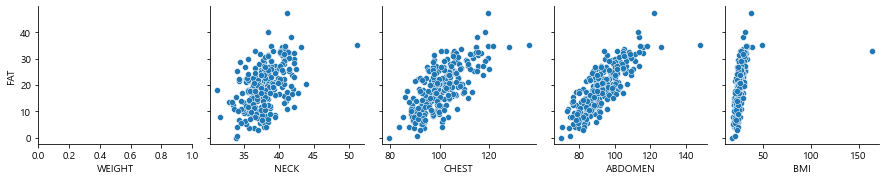

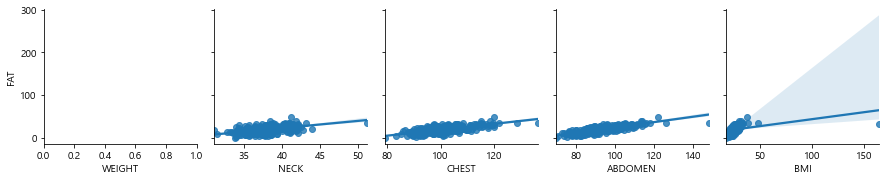

In [4]:
# 산점도 행렬: 목표변수와 설명변수 지정.
# kind="scatter"|"reg"
sns.pairplot(df_raw, y_vars="FAT", x_vars=["WEIGHT", "NECK", "CHEST", "ABDOMEN", "BMI"])

# 회귀 적합선 추가: kind="reg"
sns.pairplot(df_raw, y_vars="FAT", x_vars=["WEIGHT", "NECK", "CHEST", "ABDOMEN", "BMI"], kind="reg")


> 목표변수(FAT)와 특정 설명변수간의 선형관계 확인

>> 맨 처음 그래프가 나오지 않는건, 데이터와 코드의 문제가 아닌 컴퓨터의 문제인 거 같습니다.

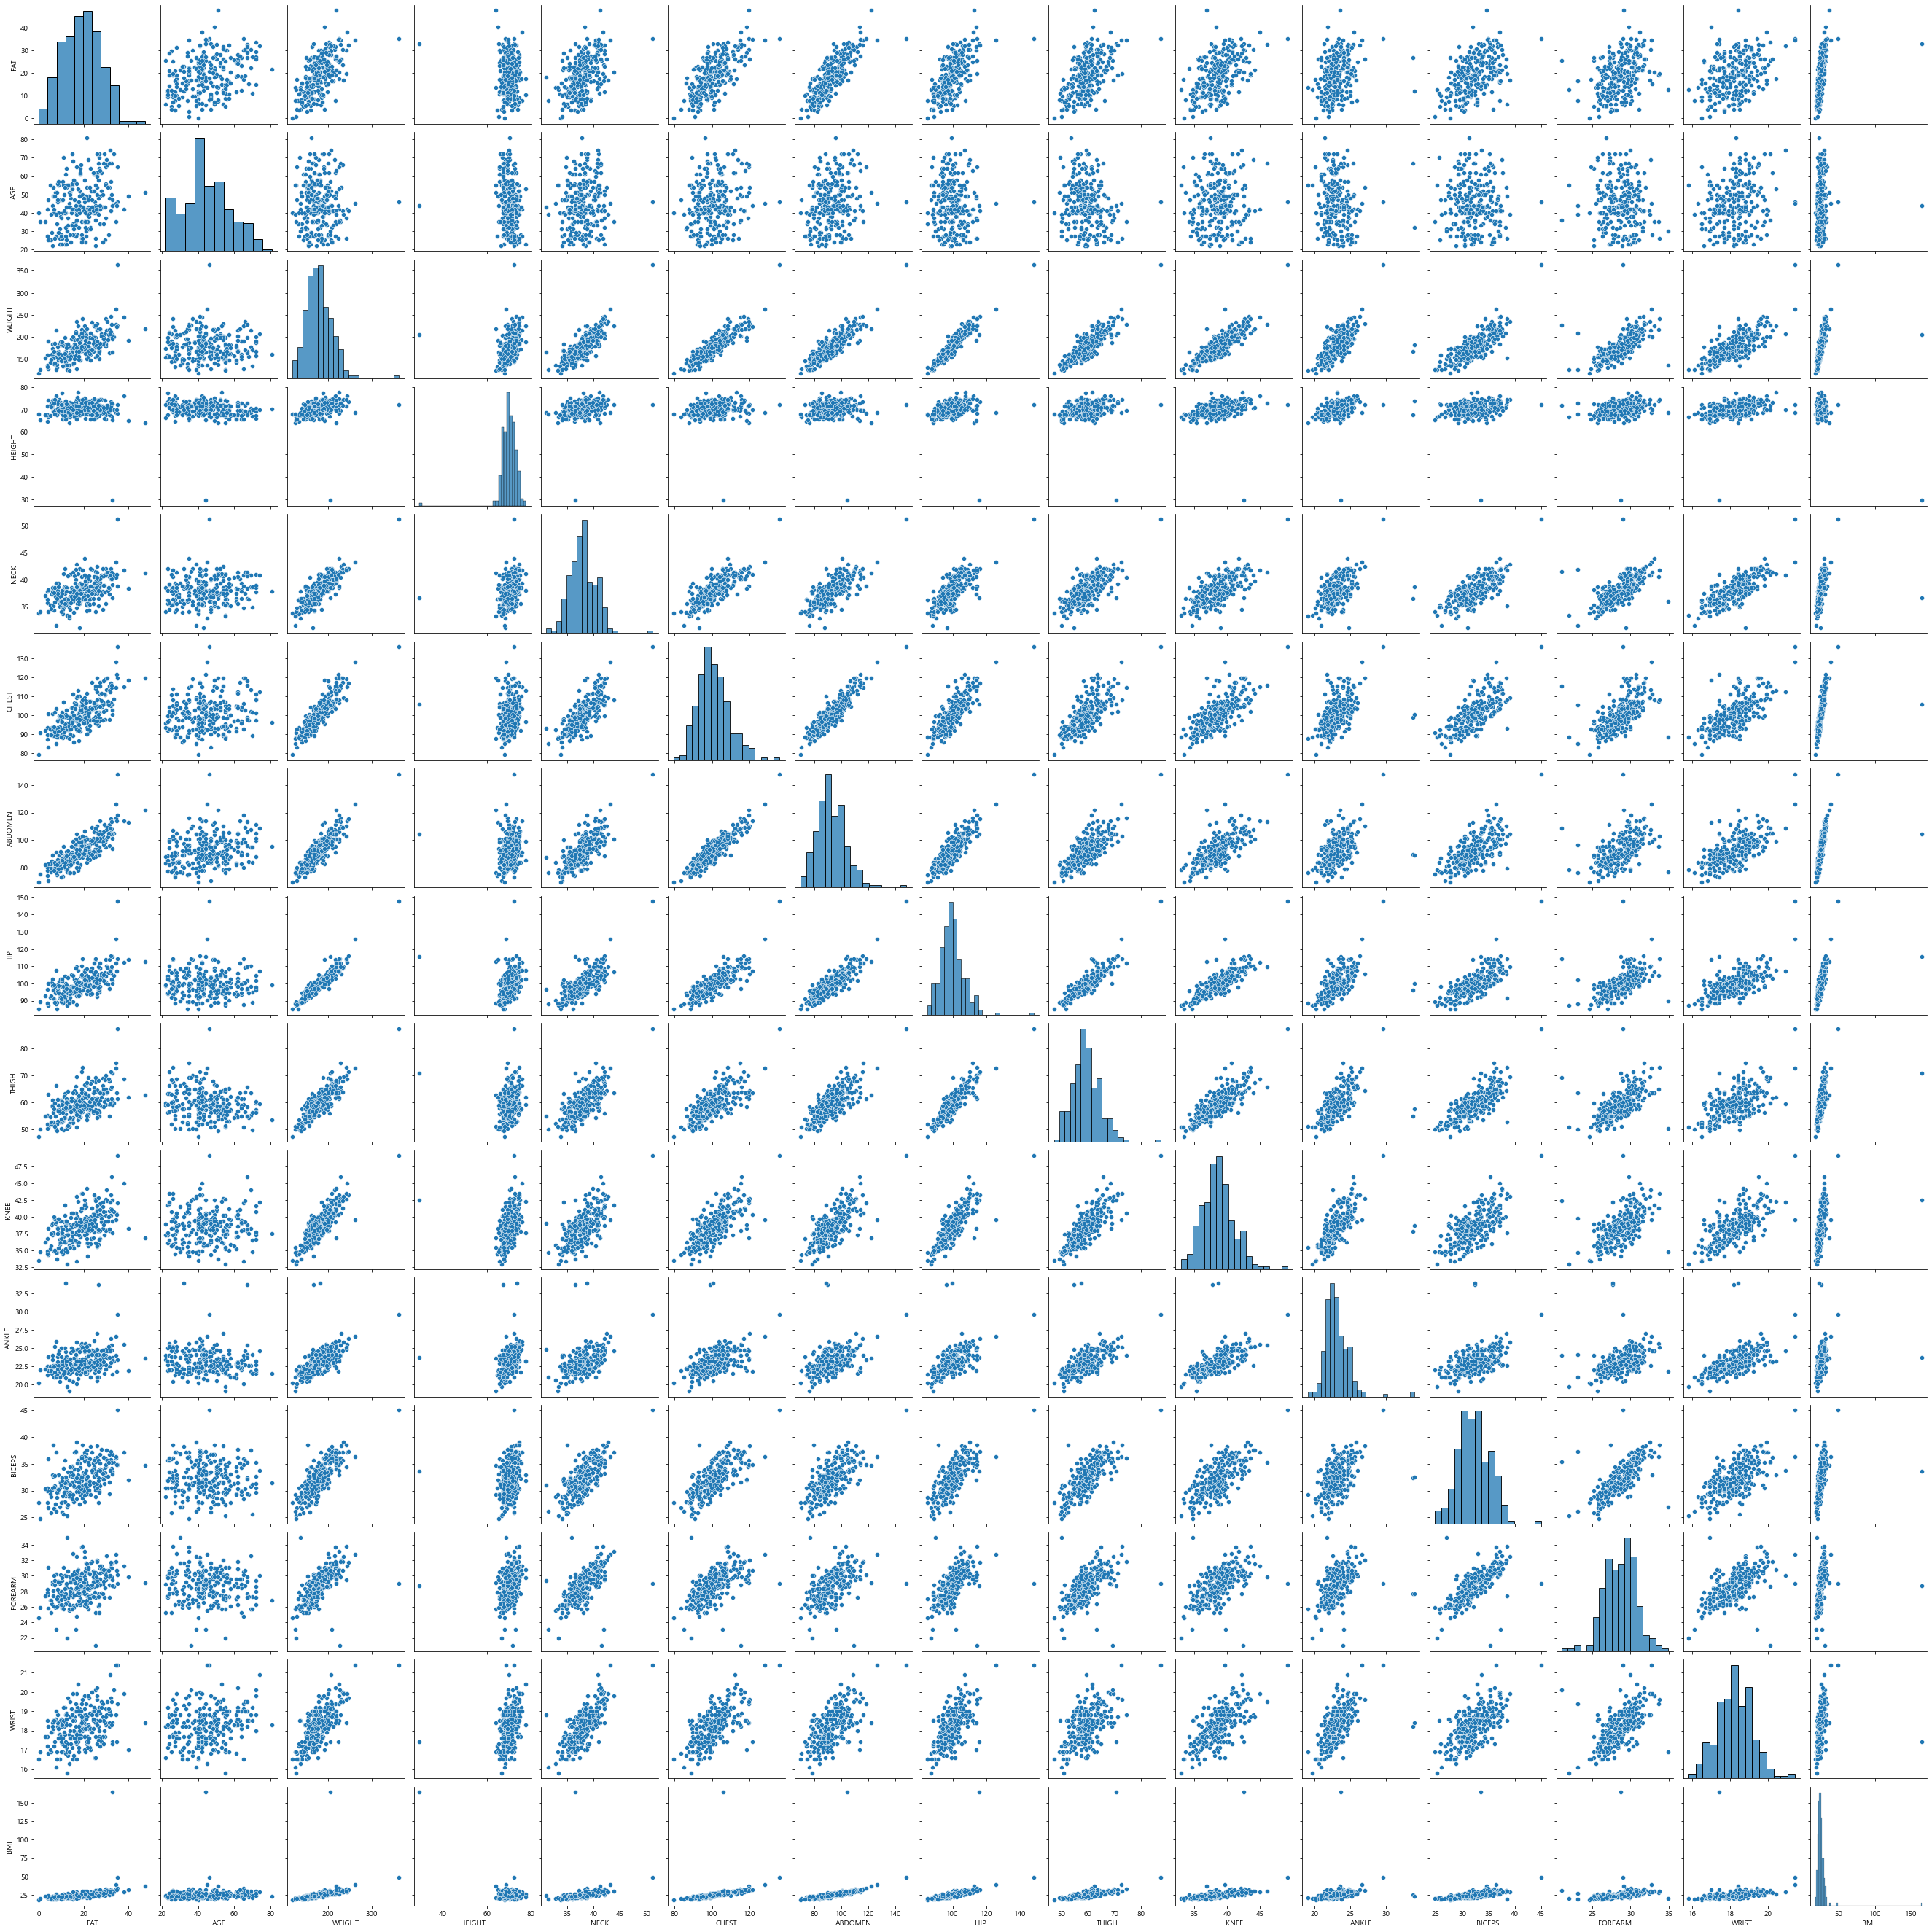

In [5]:
# 산점도 행렬: 전체 숫자형 변수
sns.pairplot(df_raw)

> 목표변수(FAT)와 선형관계가 있는 설명변수 확인됨  
> 설명변수 간의 선형관계 확인됨 (몸무게(WEIGHT), 목 둘레(NECK) 등)  
> __설명변수 간의 다중공선성 처리 필요__

In [6]:
# 상관관계 분석
df_raw.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347,0.371
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214,0.040
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730,0.391
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322,-0.638
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745,0.266
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660,0.383
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620,0.415
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630,0.462
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559,0.433
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665,0.364


<AxesSubplot:title={'center':'Correlation of Features'}>

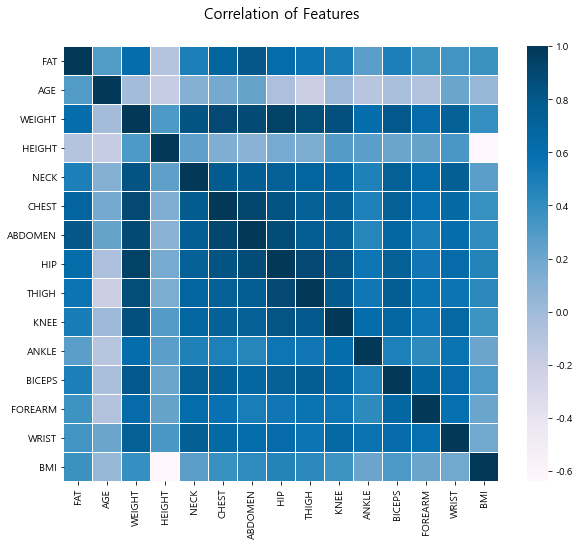

In [7]:
# 위의 표가 보기 어렵다면 heatmap을 그려본다.
colormap = plt.cm.PuBu 
plt.figure(figsize=(10, 8)) 
plt.title("Correlation of Features", y = 1.05, size = 15) 
sns.heatmap(df_raw.corr(), 
            linewidths = 0.1, 
            vmax = 1.0, 
            square = True, 
            cmap = colormap, 
            linecolor = "white", 
            annot = False, 
            annot_kws = {"size" : 16})

> 체질 비만도(FAT)와 가슴 둘레(CHEST), 복부 둘레(ABDOMEN) 간의 높은 선형관계 확인  
> 설명변수 상관관계: 다수 설명변수 간의 선형관계 확인 -> 다중공선성 확인 및 처리 필요

## 3. 회귀 모델 생성 

In [8]:
# 선형 회귀 분석: formula(y~X1+X2+...) 이용.
# 상수항(Intercept) 자동 추가.  
# 코드 중간에서 줄 바꿈 "\" 추가
reg_model=smf.ols(formula="FAT~AGE+WEIGHT+HEIGHT+NECK+CHEST+ABDOMEN+HIP+THIGH+\
KNEE+ANKLE+BICEPS+FOREARM+WRIST+BMI", data=df_raw)

# 적합
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     50.56
Date:                Wed, 03 Mar 2021   Prob (F-statistic):           5.49e-63
Time:                        03:46:53   Log-Likelihood:                -718.19
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     237   BIC:                             1519.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.2460     24.500     -0.990      0.3

> 분석 자료 수 : 252  
> 잔차 자유도 : 238  
> 모델 자유도 : 13  
> 분산분석결과 : p값이 유의수준 0.05보다 작으므로 회귀모델로서 유의
> 설명력 : 0.749 => 모델을 통하여 설명변수 EVAL을 74.9%를 설명할 수 있음.  
> 회귀계수 검정 :  
> => 절편의 유의성은 검토하지 않음  
> => ABDOMEN, FOREARM, WRIST의 p값이 유의수준 0.05보다 작으므로 유의

In [9]:
# 설명변수 간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_raw_x=df_raw.drop("FAT", axis=1)
# Statsmodels의 상수항 추가 함수 적용
df_raw_x_const=add_constant(df_raw_x)
# DataFrame으로 저장
df_vif=pd.DataFrame()
df_vif["variable"]=df_raw_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF", inplace=True)
df_vif.round(3)

,variable,VIF
10,ANKLE,1.922
12,FOREARM,2.196
1,AGE,2.251
13,WRIST,3.378
11,BICEPS,3.674
4,NECK,4.456
9,KNEE,4.815
14,BMI,7.432
8,THIGH,8.010
3,HEIGHT,9.146


> 몸무게(WEIGHT)의 VIF가 52.665로 높고 엉덩이 둘레(HIP)도 높게 나타남  
> => 변수 특성, 영향을 고려하여 모델에서 제외 검토  
> **단, 한번에 두가지 변수를 제거해서는 안된다.**

In [10]:
# 다중공선성 높은 변수(WEIGHT) 제거 후 공선성 재확인
df_raw_x=df_raw.drop(["FAT", "WEIGHT"], axis=1)
# statsmodels의 상수항 추가 함수 적용
df_raw_x_const=add_constant(df_raw_x)
# DataFrame으로 저장
df_vif=pd.DataFrame()
df_vif["variable"]=df_raw_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF", inplace=True)
df_vif.round(3)

,variable,VIF
9,ANKLE,1.847
11,FOREARM,2.196
1,AGE,2.196
12,WRIST,3.327
10,BICEPS,3.507
3,NECK,3.962
2,HEIGHT,4.665
13,BMI,4.729
8,KNEE,4.788
7,THIGH,7.837


> HIP의 VIF가 11.490으로 여전히 10 이상이므로 HIP 변수도 제거 후 공선성 재확인 필요

In [11]:
# 다중공선성 높은 변수(WEIGHT) 제거 후 공선성 재확인
df_raw_x=df_raw.drop(["FAT", "WEIGHT", "HIP"], axis=1)
# statsmodels의 상수항 추가 함수 적용
df_raw_x_const=add_constant(df_raw_x)
# DataFrame으로 저장
df_vif=pd.DataFrame()
df_vif["variable"]=df_raw_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF", inplace=True)
df_vif.round(3)

,variable,VIF
8,ANKLE,1.844
1,AGE,2.125
10,FOREARM,2.168
11,WRIST,3.300
9,BICEPS,3.506
3,NECK,3.958
12,BMI,4.309
2,HEIGHT,4.380
7,KNEE,4.732
6,THIGH,6.380


> ABDOMEN의 VIF가 9.181로 가장 크고 10에 매우 가까우나 일단 포함하여 회귀 모델 생성

In [12]:
# 다중공선성 높은 변수 제거 후 회귀 모델 생성
reg_model=smf.ols(formula="FAT~AGE+HEIGHT+NECK+CHEST+ABDOMEN+THIGH+\
KNEE+ANKLE+BICEPS+FOREARM+WRIST+BMI", data=df_raw)

# 적합
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     56.85
Date:                Wed, 03 Mar 2021   Prob (F-statistic):           4.92e-63
Time:                        03:46:53   Log-Likelihood:                -722.44
No. Observations:                 252   AIC:                             1471.
Df Residuals:                     239   BIC:                             1517.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1864      8.866      0.923      0.3

> 분석 자료 수 : 252  
> 잔차 자유도 : 239  
> 모델 자유도 : 12  
> 분산분석결과 : p값이 유의수준 0.05보다 작으므로 회귀모델로서 유의
> 설명력 : 0.741 => 다중공선성이 높은 변수를 제거하고 분석했을 때 감소(수정 결정계수도 감소)  
> 회귀계수 검정 :  
> => 절편의 유의성은 검토하지 않음  
> => AGE, NECK, ABDOMEN, FOREARM, WRIST의 p값이 유의수준 0.05보다 작으므로 유의

## 4. 후진제거법을 이용한 변수 선택

In [13]:
# RFE(recursive feature elimination) 함수 : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거
# 목표 변수 분리
df_raw_y=df_raw["FAT"]
# sklearn의 선형회귀 모델
model=LinearRegression()
# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택
rfe=RFE(estimator=model, n_features_to_select=6).fit(df_raw_x, df_raw_y)
# 선택된 변수
selected_cols=df_raw_x.columns[rfe.support_]
# 제거된 변수
removed_cols=df_raw_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols))
print("Removed Variables : {}".format(removed_cols))

Selected Variables : Index(['HEIGHT', 'NECK', 'ABDOMEN', 'FOREARM', 'WRIST', 'BMI'], dtype='object')
Removed Variables : Index(['AGE', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS'], dtype='object')


In [14]:
# 회귀 모델 생성
rfe_reg_model=smf.ols(formula="FAT~HEIGHT+NECK+ABDOMEN+FOREARM+WRIST+BMI", data=df_raw)
# 적합
rfe_reg_result=rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     110.6
Date:                Wed, 03 Mar 2021   Prob (F-statistic):           7.89e-67
Time:                        03:46:53   Log-Likelihood:                -727.33
No. Observations:                 252   AIC:                             1469.
Df Residuals:                     245   BIC:                             1493.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.0818      8.088      1.865      0.0

> 분석 자료 수 : 252  
> 잔차 자유도 : 238  
> 모델 자유도 : 13  
> 분산분석결과 : p값이 유의수준 0.05보다 작으므로 회귀모델로서 유의
> 설명력 : 0.730 => 모델을 통하여 설명변수 EVAL을 73%를 설명할 수 있음.  
> 회귀계수 검정 :  
> => 절편의 유의성은 검토하지 않음  
> => 모든 설병변수의 p값이 유의수준 0.05보다 작으므로 유의

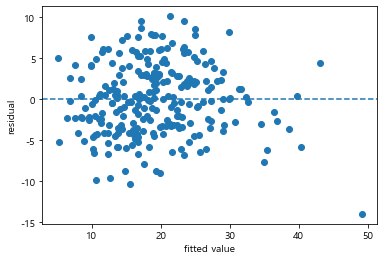

In [15]:
# 잔차 등분산성 확인
plt.scatter(rfe_reg_result.fittedvalues, rfe_reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")

> 등분산이라고 볼 수 있다.

## 5. 결론 도출 

 **[최종 모델의 회귀식]**  
 y = 15.0818 -0.4928HEIGHT -0.5841NECK + 0.8277ABDOMEN + 0.4129FOREARM -1.3191WRIST -0.1386BMI

<AxesSubplot:>

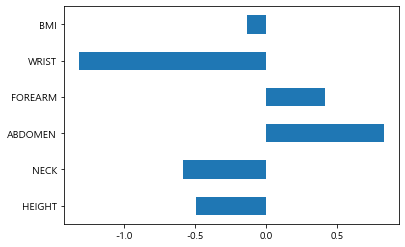

In [16]:
# 설명변수 중요도(표준화 적용 이전) -> 표준화 회귀계수 산출해야 함
df_reg_coef = pd.DataFrame({"Coef":rfe_reg_result.params.values[1:]}, index=selected_cols)
df_reg_coef.plot.barh(y="Coef", legend=False)

> - 중요도는 회귀계수의 절대값 크기
> - 손목 두께(WRIST)가 얇을수록 체질 비만도(FAT)가 높음
> - 복부 둘레(ABBOMEN)가 커질수록 체질 비만도(FAT)가 높음

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     110.6
Date:                Wed, 03 Mar 2021   Prob (F-statistic):           7.89e-67
Time:                        03:46:54   Log-Likelihood:                -727.33
No. Observations:                 252   AIC:                             1469.
Df Residuals:                     245   BIC:                             1493.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1508      0.277     69.110      0.0

<AxesSubplot:>

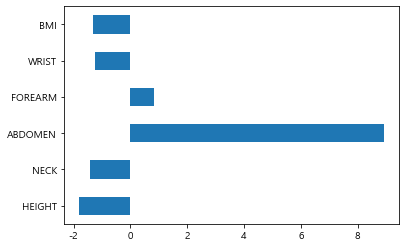

In [17]:
# 설명변수 표준화 적용 -> 표준화 회귀계수 산출 목적
scaler = StandardScaler()
# Scale 변환대상 변수 : 일반적으로 설명변수
cols=df_raw_x.columns
# Scale 변환
np_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(np_scaled, columns=cols)
# 목표변수 추가
df_scaled["FAT"]=df_raw["FAT"]
reg_model_scaled=smf.ols(formula="FAT~HEIGHT+NECK+ABDOMEN+FOREARM+WRIST+BMI", data=df_scaled)
reg_result_scaled=reg_model_scaled.fit()
print(reg_result_scaled.summary())
# 설명변수 중요도(표준화 적용 이전) -> 표준화 회귀계수 산출해야 함
df_reg_coef=pd.DataFrame({"Coef":reg_result_scaled.params.values[1:]}, index=selected_cols)
df_reg_coef.plot.barh(y="Coef", legend=False)

> 회귀계수의 방향은 동일하나 중요도 크기가 변함  
> 복부 둘레(ABBOMEN)가 가장 중요하고 손목 두께(WRIST)의 중요도가 많이 줄어듬  
> 단, 모델의 통계량은 변화 없음.